# Import Data

In [1]:
#load the data
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#after exporting the files from the linear regression notebook you will choose those files you want to work with
files_names = ["df_ML_ID1", "df_ML_ID6", "df_ML_ID7", "df_ML_ID19"]
my_list = []
for item in files_names:
    data_file = "/Users/francopallitto/Documents/DS_projects/nispera/data/interim/"+item+".csv"
    my_list.append(pd.read_csv(data_file))
df = pd.concat(my_list).drop(columns = "index")

In [3]:
#fillna with 0 with power_iqr
#The Null objects in the power IQR are there because there were not spoted as an anomally.
# In case they were an anommally they will have a high power IQR also the 0 it's placed here
# because it's a provisory file
df["power_iqr"] = df["power_iqr"].fillna(0)
a = df[df["anomalies"] == "Power Curtailment"]["anom_wind_diff"].mean()
# Similar caase in case the points is not an anomaly we establish a 0
df["anom_wind_diff"] = [a if anomaly == "Power Curtailment" else 0 for anomaly in df["anom_wind_diff"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35020 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               35020 non-null  object 
 1   datetime                         35020 non-null  object 
 2   environment_air_temperature_avg  35020 non-null  float64
 3   environment_wind_speed_avg       35020 non-null  float64
 4   grid_power_active_avg            35020 non-null  float64
 5   rotor_blades_pitch_angle_avg     33344 non-null  float64
 6   rotor_rotation_speed_avg         33972 non-null  float64
 7   week                             35020 non-null  int64  
 8   prediction                       35020 non-null  float64
 9   power_diff                       35020 non-null  float64
 10  week_diff                        34732 non-null  float64
 11  power_iqr                        35020 non-null  float64
 12  anom_wind_diff     

In [4]:
df.dropna(inplace = True)

In [17]:
X = df.drop(columns=["anomalies", "ID", "datetime"])
y = df["anomalies"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape

((23139, 11), (9918, 11))

In [29]:

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

#or you choose the KNN model
knn = KNeighborsClassifier()
knn

#or you choose the lr model. We had better results with the KNN model
lr_model = knn
#lr_model = LogisticRegression(random_state=42, solver='liblinear')
#lr_model

In [30]:
scores = {}

In [31]:

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

class_labels = lr_model.classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)


                   precision    recall  f1-score   support

           Normal       0.91      0.96      0.94      8288
Power Curtailment       0.66      0.77      0.71       355
      Power Shift       0.71      0.42      0.53      1275

         accuracy                           0.89      9918
        macro avg       0.76      0.72      0.72      9918
     weighted avg       0.88      0.89      0.88      9918



,Normal,Power Curtailment,Power Shift
Normal,7985,95,208
Power Curtailment,74,273,8
Power Shift,693,48,534


In [32]:
X_test["prediction"] = y_pred

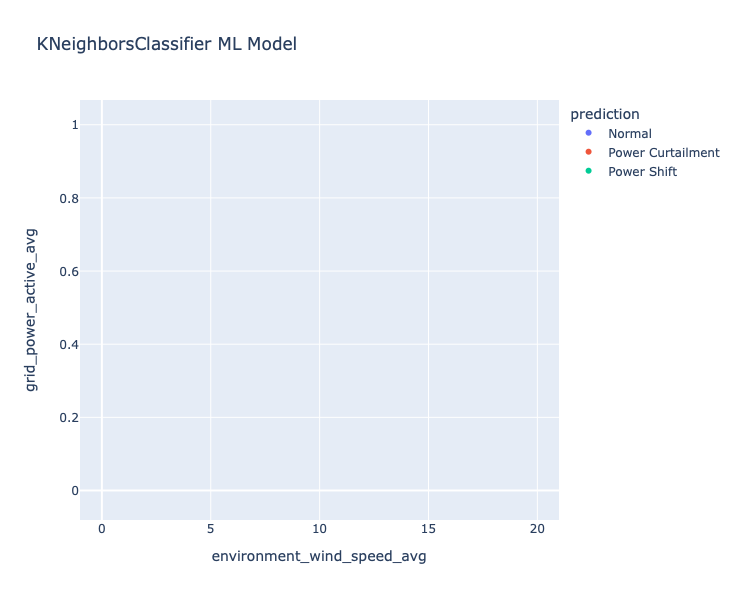

In [33]:
fig = px.scatter(X_test, x = "environment_wind_speed_avg", y ="grid_power_active_avg",color = "prediction", width=800, height=600, title="KNeighborsClassifier ML Model")
fig.show()